# Example 3

This notebook is available on github
[here](https://github.com/aezarebski/aas-extended-examples). If you find errors
or would like to suggest an improvement, feel free to create an issue.

As usual we will start by importing some useful libraries.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import os.path as path

In this notebook we will also use an additional module, `heatmap`, which
provides a function for drawing heatmaps of the correlations between columns of
a pandas dataframe. If you have downloaded this code from GitHub you should
already have the file, if you are using Colab, the following will download a
copy of into your session.

In [2]:
if path.exists('heatmap.py'):
    from heatmap import correlation_heatmap
else:
    import requests
    heatmap_py_url = 'https://raw.githubusercontent.com/aezarebski/aas-extended-examples/main/example-3/heatmap.py'
    req = requests.get(heatmap_py_url)
    with open('urlheatmap.py', 'w') as f:
        f.write(req.text)
    from urlheatmap import correlation_heatmap

The data in `data-auto.csv` is a popular dataset of car characteristics. In this
notebook we will be looking at the miles per gallon (MPG) achieved by these cars
based on some features of the cars and where/when they were produced. The
`origin` of origin of the car is encoded as an integer, (recall you can use the
`dtypes` method to see this). The representation of the data is clearer by
mapping it to a string describing the origin.

In [3]:
data_csv = 'data-auto.csv'
if not path.exists(data_csv):
    data_csv = 'https://raw.githubusercontent.com/aezarebski/aas-extended-examples/main/example-3/data-auto.csv'
df = pd.read_csv(data_csv)

In [4]:
df.origin = df.origin.map({1: 'America', 2: 'Europe', 3: 'Japan'})

In [5]:
col_names = df.columns.to_list()
numeric_cols = col_names[0:7]

A heatmap of the correlations between the variables in the data is a good way to get a feel for the data.

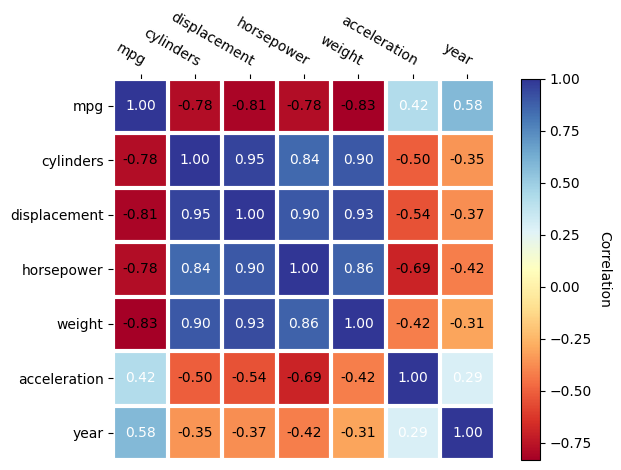

In [6]:
correlation_heatmap(df[numeric_cols])
plt.show()

<Figure size 640x480 with 0 Axes>

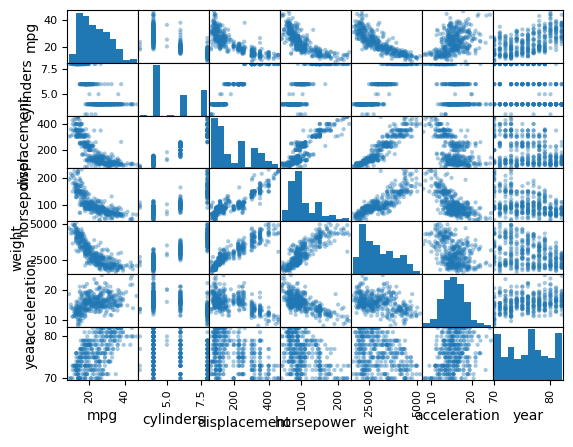

In [7]:
plt.figure()
pd.plotting.scatter_matrix(df[numeric_cols], alpha = 0.4)
plt.show()

### Question

What do you notice about `cylinders`, `displacement`, `horsepower` and `weight`? How do they relate to `mpg`?

### Answer

These variables are all highly correlated with each other and decreasing MPG; given what we know about cars this also makes sense from a mechanical perspective. They have a non-linear relationship with `mpg`.

### Question

Fit an ordinary linear regression for the MPG using all of the variables (excluding the name of the car). Print a summary of the fitted model. Comment on the results, how has the MPG changed over time? Save the fitted model as `fit_1`, note the `1`, we are going to improve on this below.

### Answer

In [8]:
form_1 = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin'
fit_1 = smf.ols(formula = form_1, data = df).fit()
fit_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          1.79e-139
Time:                        13:06:00   Log-Likelihood:                -1020.5
No. Observations:                 392   AIC:                             2059.
Df Residuals:                     383   BIC:                             2095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -17.9546      4.677     -3.839      0.000     -27.150      -8.759
origin[T.Europe]     2.6300      0.566      4.643      0.000       1.516       3.744
origin[T.Japan]      2.8532      0.553      5.162      0.000       1.766       3.940
cylinders           -0.4897      0.321     -1.524      0.128      -1.121       0.142
displacement         0.0240      0.008      3.133      0.002       0.009       0.039
horsepower          -0.0182      0.014     -1.326      0.185      -0.045       0.009
weight              -0.0067      0.001    -10.243      0.000      -0.008      -0.005
acceleration         0.0791      0.098      0.805      0.421      -0.114       0.272
year                 0.7770      0.052     15.005      0.000       0.675       0.879
==============================================================================
Omnibus:                       23.395   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.452
Skew:                           0.444   Prob(JB):                     3.30e-08
Kurtosis:                       4.150   Cond. No.                     8.70e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Question

Plot the residuals against the fitted values, what do you notice?

### Answer

There is some clear non-linearity and the variance is not constant.

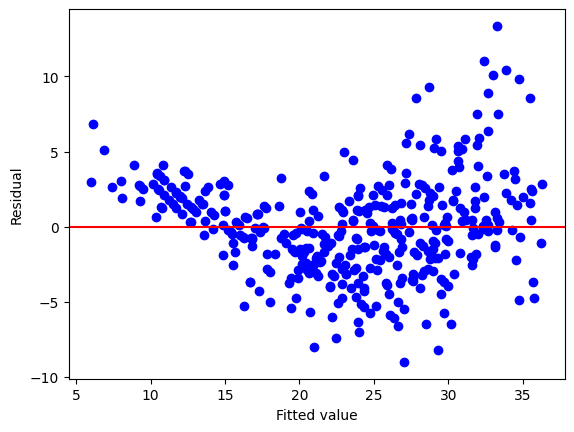

In [9]:
def make_fittedvalues_resid_plot(fit):
    plt.figure()
    plt.scatter(fit.fittedvalues, fit.resid, color='b')
    plt.axhline(y=0, color='r')
    plt.xlabel("Fitted value")
    plt.ylabel("Residual")
    return


make_fittedvalues_resid_plot(fit_1)
plt.show()

### Question

What does this model tell us about fuel efficiency across the years?

### Answer

**Keeping the attributes of a car constant**, each year, new cars get about `0.8` more miles per gallon **on average**. Note that the types of cars produced change over time, there is a trend for newer cars to be lighter, however this model fit still suggests there are improvements in efficiency beyond this.

### Question

Apply some transforms to reduce non-linearities in the relationship between the predictors and the response.

### Answer

Looking at the scatter plots, we can see that the `displacement`, `horsepower` and `weight` all appear to have a non-linear relationship. To adjust for this we can log-transform these variables.

<Figure size 640x480 with 0 Axes>

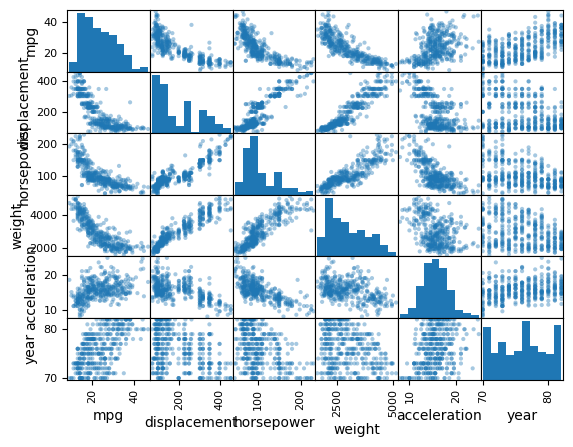

In [10]:
plt.figure()
pd.plotting.scatter_matrix(df[['mpg',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',                         
 'year']], alpha = 0.4)
plt.show()

<Figure size 640x480 with 0 Axes>

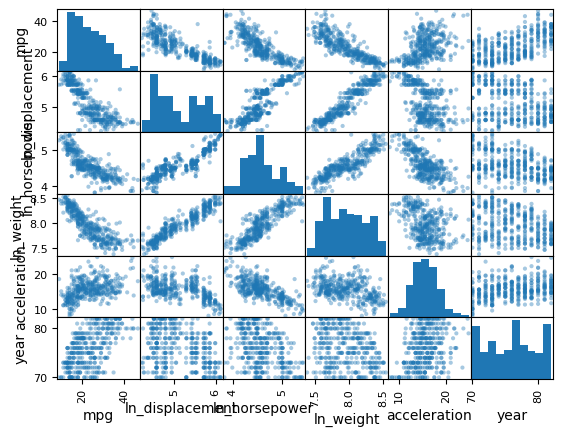

In [11]:
df['ln_weight'] = np.log(df.weight)
df['ln_horsepower'] = np.log(df.horsepower)
df['ln_displacement'] = np.log(df.displacement)

plt.figure()
pd.plotting.scatter_matrix(df[['mpg',
 'ln_displacement',
 'ln_horsepower',
 'ln_weight',
 'acceleration',
 'year']], alpha = 0.4)
plt.show()

### Question

Re-fit the model (as `fit_2`) with the transformed variables and comment on what has changed.

### Answer

The log transformation of the variables has improved the fit. There is still some strong collinearity though.

In [12]:
form_2 = 'mpg ~ cylinders + ln_displacement + ln_horsepower + ln_weight + acceleration + year + origin'
fit_2 = smf.ols(formula = form_2, data = df).fit()
fit_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     268.4
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          7.16e-152
Time:                        13:06:03   Log-Likelihood:                -991.16
No. Observations:                 392   AIC:                             2000.
Df Residuals:                     383   BIC:                             2036.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          112.3638     10.114     11.110      0.000      92.479     132.249
origin[T.Europe]     1.5069      0.564      2.673      0.008       0.399       2.615
origin[T.Japan]      1.6843      0.560      3.010      0.003       0.584       2.784
cylinders            0.4113      0.286      1.440      0.151      -0.150       0.973
ln_displacement     -0.7230      1.489     -0.486      0.627      -3.650       2.204
ln_horsepower       -5.5238      1.569     -3.520      0.000      -8.609      -2.439
ln_weight          -14.6358      2.268     -6.453      0.000     -19.095     -10.177
acceleration        -0.1827      0.103     -1.778      0.076      -0.385       0.019
year                 0.7451      0.048     15.448      0.000       0.650       0.840
==============================================================================
Omnibus:                       36.935   Durbin-Watson:                   1.367
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.311
Skew:                           0.558   Prob(JB):                     8.90e-16
Kurtosis:                       4.732   Cond. No.                     5.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

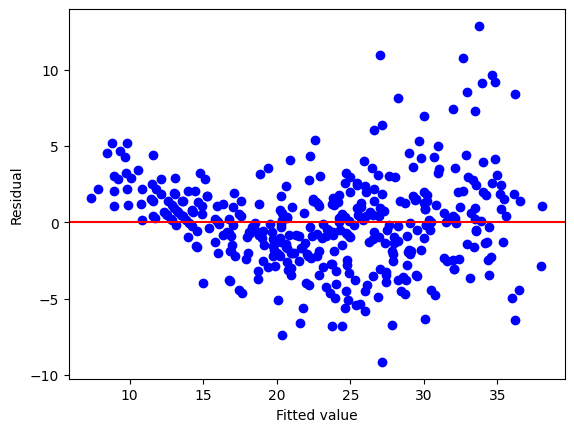

In [13]:
make_fittedvalues_resid_plot(fit_2)
plt.show()

### Question

Remove the `ln_displacement` variable in a new model `fit_3`. Comment on how the model has changed.

### Answer

Removing `ln_displacement` has produced a more parsimonious model without reducing the model fit.

In [14]:
form_3 = 'mpg ~ cylinders + ln_horsepower + ln_weight + acceleration + year + origin'
fit_3 = smf.ols(formula = form_3, data = df).fit()
fit_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     307.3
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          4.43e-153
Time:                        13:06:03   Log-Likelihood:                -991.28
No. Observations:                 392   AIC:                             1999.
Df Residuals:                     384   BIC:                             2030.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          113.8057      9.659     11.783      0.000      94.815     132.796
origin[T.Europe]     1.6384      0.494      3.317      0.001       0.667       2.610
origin[T.Japan]      1.8089      0.497      3.641      0.000       0.832       2.786
cylinders            0.3205      0.216      1.486      0.138      -0.104       0.745
ln_horsepower       -5.4986      1.567     -3.510      0.001      -8.579      -2.418
ln_weight          -15.2827      1.834     -8.334      0.000     -18.888     -11.677
acceleration        -0.1727      0.101     -1.717      0.087      -0.371       0.025
year                 0.7474      0.048     15.588      0.000       0.653       0.842
==============================================================================
Omnibus:                       36.045   Durbin-Watson:                   1.367
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.371
Skew:                           0.552   Prob(JB):                     3.87e-15
Kurtosis:                       4.687   Cond. No.                     4.94e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Question

In a new model, `fit_4`, include an interaction term between the origin of the cars and their year or release. What does this tell you about car manufactoring in the considered regions?

### Answer

We see that Europe and Japan are improving their efficiency faster than America.

In [15]:
form_4 = form_3 + ' + origin * year'
fit_4 = smf.ols(formula = form_4, data = df).fit()
fit_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     252.1
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          1.00e-154
Time:                        13:06:03   Log-Likelihood:                -981.48
No. Observations:                 392   AIC:                             1983.
Df Residuals:                     382   BIC:                             2023.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               128.2736     10.017     12.806      0.000     108.579     147.968
origin[T.Europe]        -36.1741      9.430     -3.836      0.000     -54.715     -17.634
origin[T.Japan]         -23.3315      8.685     -2.687      0.008     -40.407      -6.256
cylinders                 0.1463      0.215      0.681      0.496      -0.276       0.569
ln_horsepower            -4.7098      1.548     -3.042      0.003      -7.754      -1.666
ln_weight               -15.9931      1.802     -8.873      0.000     -19.537     -12.449
acceleration             -0.1347      0.099     -1.354      0.176      -0.330       0.061
year                      0.5897      0.060      9.877      0.000       0.472       0.707
origin[T.Europe]:year     0.4949      0.124      4.005      0.000       0.252       0.738
origin[T.Japan]:year      0.3230      0.112      2.891      0.004       0.103       0.543
==============================================================================
Omnibus:                       29.354   Durbin-Watson:                   1.401
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.893
Skew:                           0.458   Prob(JB):                     1.98e-12
Kurtosis:                       4.569   Cond. No.                     6.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

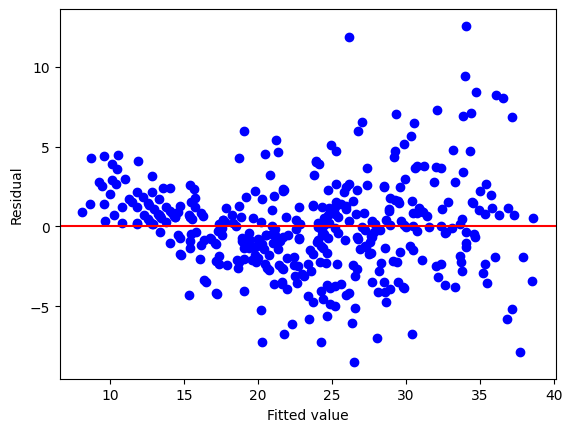

In [16]:
make_fittedvalues_resid_plot(fit_4)
plt.show()